In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd 

In [6]:
df = pd.read_csv('results.csv')

In [7]:
df

,branch,samples,seed,selectivity,parallelism,read_ios,write_ios,hit_rate
0,pbm1,NaN,15930,0.1,32,126857453.0,7566.0,0.524463
1,base,NaN,15930,0.1,32,121156888.0,9206.0,0.519433
2,pbm2,20.0,9774,0.1,64,177945313.0,14215.0,0.772653
3,base,NaN,19740,0.1,32,127834538.0,9612.0,0.498873
4,pbm2,1.0,4448,0.1,32,168613022.0,13298.0,0.474312
...,...,...,...,...,...,...,...,...
65,pbm2,20.0,4448,0.1,64,175232451.0,10573.0,0.779047
66,base,NaN,9774,0.1,64,166113899.0,13671.0,0.631164
67,base,NaN,19357,0.1,32,117214155.0,9522.0,0.540400
68,base,NaN,4448,0.1,32,122901269.0,8025.0,0.499021


In [8]:
interesting_combinations = {
    "base": {
        "branch": "base",
    }, 
    "pq": {
        "branch": "pbm1"
    }, 
}

for sample_size in df['samples'].unique():
    if pd.isna(sample_size): 
        continue
    interesting_combinations[f"pbm ({sample_size})"] = {
        "branch": "pbm2",
        "samples": sample_size
    }

In [9]:
interesting_combinations

{'base': {'branch': 'base'},
 'pq': {'branch': 'pbm1'},
 'pbm (20.0)': {'branch': 'pbm2', 'samples': 20.0},
 'pbm (1.0)': {'branch': 'pbm2', 'samples': 1.0},
 'pbm (10.0)': {'branch': 'pbm2', 'samples': 10.0}}

In [10]:
for combination_name, combination in interesting_combinations.items():
    filtered_df = df.copy()
    for key, value in combination.items():
        filtered_df = filtered_df[filtered_df[key] == value]
    
    print(f"Combination: {combination_name}")
    print(filtered_df)
    

Combination: base
   branch  samples   seed  selectivity  parallelism     read_ios  write_ios  \
1    base      NaN  15930          0.1           32  121156888.0     9206.0   
3    base      NaN  19740          0.1           32  127834538.0     9612.0   
10   base      NaN   3127          0.1           32  123108909.0     6488.0   
11   base      NaN   4448          0.1           64  167420608.0    11867.0   
23   base      NaN  19740          0.1           64  168480366.0     7026.0   
26   base      NaN   3636          0.1           32  126559858.0    10307.0   
43   base      NaN   9774          0.1           32  123677699.0    10788.0   
44   base      NaN   3636          0.1           64  166878866.0     7368.0   
51   base      NaN   3127          0.1           64  164058977.0     6986.0   
52   base      NaN  19357          0.1           64  171959653.0     8844.0   
64   base      NaN  15930          0.1           64  163191016.0     9909.0   
66   base      NaN   9774         

In [23]:
filtered_df

,branch,samples,seed,selectivity,parallelism,read_ios,write_ios,hit_rate
15,pbm2,1.0,3636,0.1,24,218289713.0,8822.0,0.441180
16,pbm2,1.0,19740,0.1,24,217011194.0,6362.0,0.459432
23,pbm2,1.0,3636,0.1,12,156050657.0,11213.0,0.375130
29,pbm2,1.0,19357,0.1,12,157971803.0,6200.0,0.362251
33,pbm2,1.0,9774,0.1,24,218892213.0,10899.0,0.452707
36,pbm2,1.0,19357,0.1,24,216492684.0,3683.0,0.445960
50,pbm2,1.0,4448,0.1,24,218339615.0,14222.0,0.459131
54,pbm2,1.0,19740,0.1,12,157497817.0,2897.0,0.371363
58,pbm2,1.0,4448,0.1,12,158082603.0,4009.0,0.352793
65,pbm2,1.0,9774,0.1,12,152181754.0,4403.0,0.396990


In [24]:
df

,branch,samples,seed,selectivity,parallelism,read_ios,write_ios,hit_rate
0,pbm1,NaN,19740,0.1,24,186290426.0,5677.0,0.509354
1,pbm2,20.0,9774,0.1,12,123083069.0,3476.0,0.608478
2,pbm1,NaN,3636,0.1,24,188077319.0,10817.0,0.499797
3,pbm2,20.0,4448,0.1,24,177072512.0,7563.0,0.675953
4,pbm2,20.0,9774,0.1,24,175943890.0,10183.0,0.671434
...,...,...,...,...,...,...,...,...
65,pbm2,1.0,9774,0.1,12,152181754.0,4403.0,0.396990
66,pbm1,NaN,19740,0.1,12,132499794.0,6997.0,0.392188
67,pbm3,20.0,19740,0.1,12,142457925.0,9347.0,0.371006
68,pbm3,10.0,19740,0.1,12,143115875.0,7451.0,0.400880


In [11]:
df_ = df.copy()
mean_hit_rates = df_.groupby(['branch', 'samples', 'parallelism'], dropna=False)['hit_rate'].mean().reset_index()


In [12]:
mean_hit_rates

,branch,samples,parallelism,hit_rate
0,base,NaN,32,0.510232
1,base,NaN,64,0.595456
2,pbm1,NaN,32,0.546353
3,pbm1,NaN,64,0.657236
4,pbm2,1.0,32,0.494630
5,pbm2,1.0,64,0.606157
6,pbm2,10.0,32,0.704286
7,pbm2,10.0,64,0.767102
8,pbm2,20.0,32,0.726589
9,pbm2,20.0,64,0.780426


Branch: base, Samples: nan
Branch: pbm1, Samples: nan
Branch: pbm2, Samples: 1.0
Branch: pbm2, Samples: 10.0
Branch: pbm2, Samples: 20.0


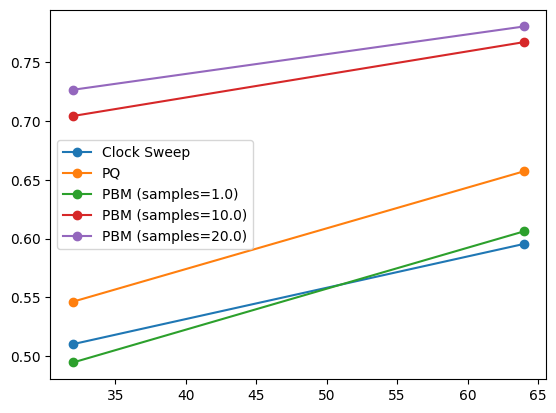

In [15]:
def get_title(branch, samples): 
    if branch == 'base':
        return "Clock Sweep"

    if branch == 'pbm1':
        return "PQ"
    
    if branch == 'pbm2':
        return f"PBM (samples={samples})"
    
    return "SPECIFY TITLE"

for (branch, samples), group_data in mean_hit_rates.groupby(['branch', 'samples'], dropna=False):
    print(f"Branch: {branch}, Samples: {samples}")
    plt.plot(group_data['parallelism'], group_data['hit_rate'], marker='o', label=get_title(branch, samples))
    
plt.legend()